# ML Assignment 1 – Statistical Measures and Hypothesis Testing
## Students Performance in Exams - Statistical Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/StudentsPerformance.csv')

In [3]:
dataset.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


# Analysis Steps:-
## 1.	Descriptive Statistics:


In [33]:
score_columns = ['math score', 'reading score', 'writing score']
for column in score_columns:
    print(f"\n {column} values :")
    print("-" * 25)
    # Mean
    mean = df[column].mean()
    print(f"Mean  : {mean}")
    
    # Median
    median = df[column].median()
    print(f"Median  : {median}")
    
    # Mode
    mode = df[column].mode()[0]
    print(f"Mode : {mode}")
    
    # Minimum
    minimum = df[column].min()
    print(f"Minimum  : {minimum}")
    
    # Maximum
    maximum = df[column].max()
    print(f"Maximum  : {maximum}")
    
    # Standard Deviation
    std_dev = df[column].std()
    print(f"Standard Deviation : {std_dev:.3f}")


 math score values :
-------------------------
Mean  : 66.089
Median  : 66.0
Mode : 65
Minimum  : 0
Maximum  : 100
Standard Deviation : 15.163

 reading score values :
-------------------------
Mean  : 69.169
Median  : 70.0
Mode : 72
Minimum  : 17
Maximum  : 100
Standard Deviation : 14.600

 writing score values :
-------------------------
Mean  : 68.054
Median  : 69.0
Mode : 74
Minimum  : 10
Maximum  : 100
Standard Deviation : 15.196


- The mean, median, and mode for all three subjects are relatively close, suggesting that the data is somewhat symmetrically distributed.
- Reading appears to be the subject where students perform the best on average, with the highest mean and median scores.

- Math seems to be the most challenging subject, with the lowest mean and median scores, and the presence of a minimum score of 0.

- Writing scores are intermediate, with a mean and median slightly lower than reading but higher than math.

In [128]:
dataset[['math score', 'reading score', 'writing score']].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 2.	Identify and Handle Outliers:

- 2.1.Use boxplots to visually identify outliers in the math score, reading score, and writing score columns.

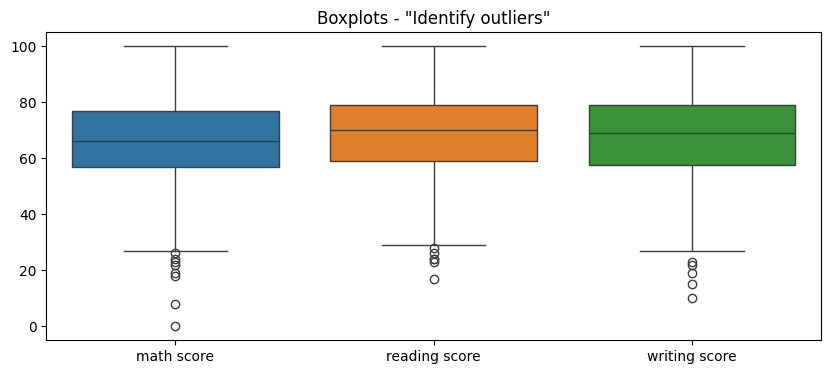

In [132]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[score_columns])
plt.title('Boxplots - "Identify outliers"')
plt.show()

- 2.2.	Calculate the Interquartile Range (IQR) for each of these score columns.
- 2.3.	Determine the lower and upper bounds for outliers using the IQR method.


In [133]:
 #math score
Q1=df['math score'].quantile(0.25)
Q3=df['math score'].quantile(0.75)
IQR = Q3 - Q1  
Lowerbound = Q1 - 1.5 * IQR
Upperbound = Q3 + 1.5 * IQR
newdf1=df[(df['math score']>=Lowerbound) & (df['math score']<=Upperbound)]

 #reading score
Q1=df['reading score'].quantile(0.25)
Q3=df['reading score'].quantile(0.75)
IQR = Q3 - Q1  
Lowerbound = Q1 - 1.5 * IQR
Upperbound = Q3 + 1.5 * IQR
newdf2=df[(df['reading score']>=Lowerbound) & (df['reading score']<=Upperbound)]

 #writing score
Q1=df['writing score'].quantile(0.25)
Q3=df['writing score'].quantile(0.75)
IQR = Q3 - Q1  
Lowerbound = Q1 - 1.5 * IQR
Upperbound = Q3 + 1.5 * IQR
newdf3=df[(df['writing score']>=Lowerbound) & (df['writing score']<=Upperbound)]

# Print of all results
print("Math score columns :")
print("-" *25)
print(f"Q1 = '{Q1}'")
print(f"Q3 = '{Q3}'")
print(f"IQR: '{IQR}'")
print(f"Lower Bound: '{Lowerbound}' \nUpper Bound: '{Upperbound}'")
print("\n")

print("Reading score columns :")
print("-" *25)
print(f"Q1 = '{Q1}'")
print(f"Q3 = '{Q3}'")
print(f"IQR: '{IQR}'")
print(f"Lower Bound: '{Lowerbound}' \nUpper Bound: '{Upperbound}'")
print("\n")

print("writing score columns :")
print("-" *25)
print(f"Q1 = '{Q1}'")
print(f"Q3 = '{Q3}'")
print(f"IQR: '{IQR}'")
print(f"Lower Bound: '{Lowerbound}' \nUpper Bound: '{Upperbound}'")

Math score columns :
-------------------------
Q1 = '57.75'
Q3 = '79.0'
IQR: '21.25'
Lower Bound: '25.875' 
Upper Bound: '110.875'


Reading score columns :
-------------------------
Q1 = '57.75'
Q3 = '79.0'
IQR: '21.25'
Lower Bound: '25.875' 
Upper Bound: '110.875'


writing score columns :
-------------------------
Q1 = '57.75'
Q3 = '79.0'
IQR: '21.25'
Lower Bound: '25.875' 
Upper Bound: '110.875'


- 2.4.	Handle the outliers by removing them from the dataset.

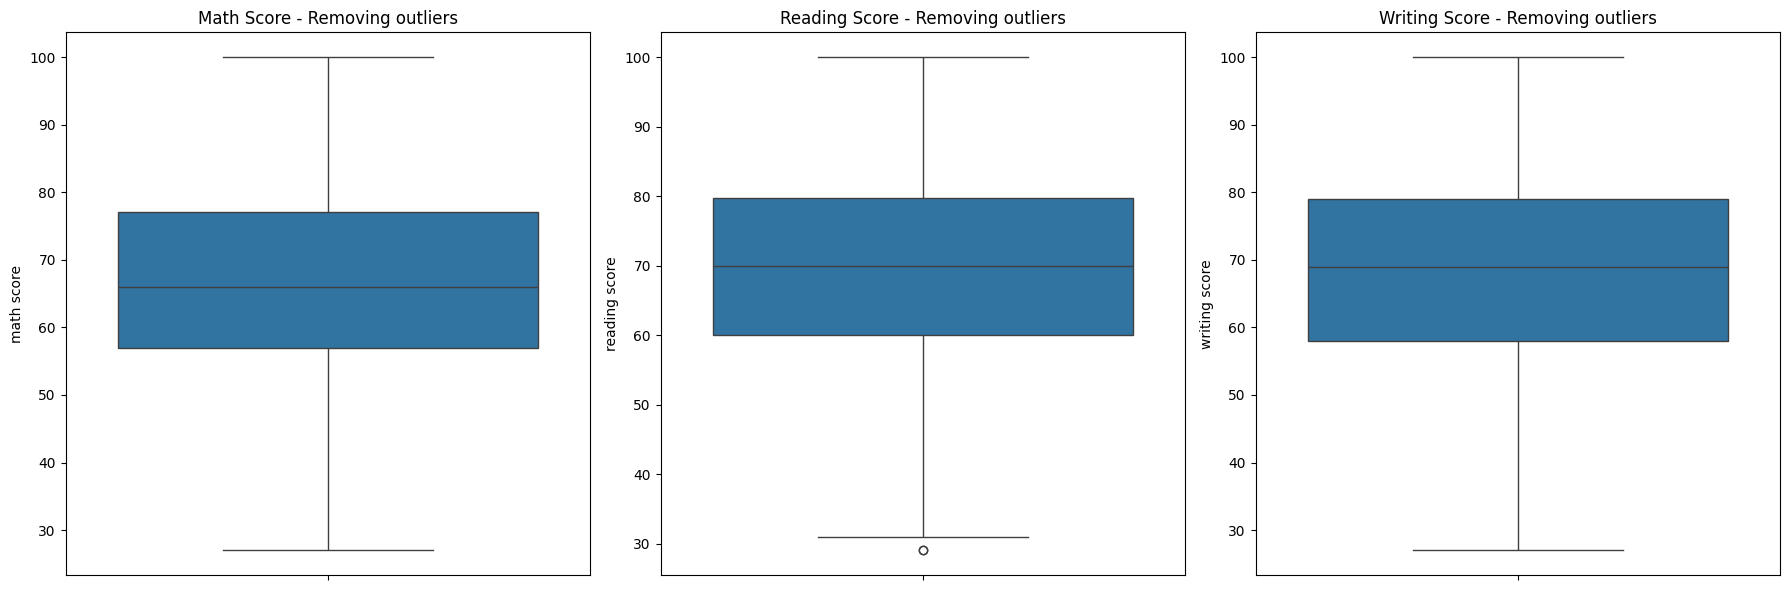

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=newdf1["math score"], ax=axes[0])
axes[0].set_title('Math Score - Removing outliers')


sns.boxplot(data=newdf2["reading score"], ax=axes[1])
axes[1].set_title('Reading Score - Removing outliers')


sns.boxplot(data=newdf3["writing score"], ax=axes[2])
axes[2].set_title('Writing Score - Removing outliers')

plt.tight_layout()
plt.show()

### 3.	Check Distribution and Skewness:

- 3.1.	Plot histograms and/or density plots for math score, reading score, and writing score to visualize their distributions.


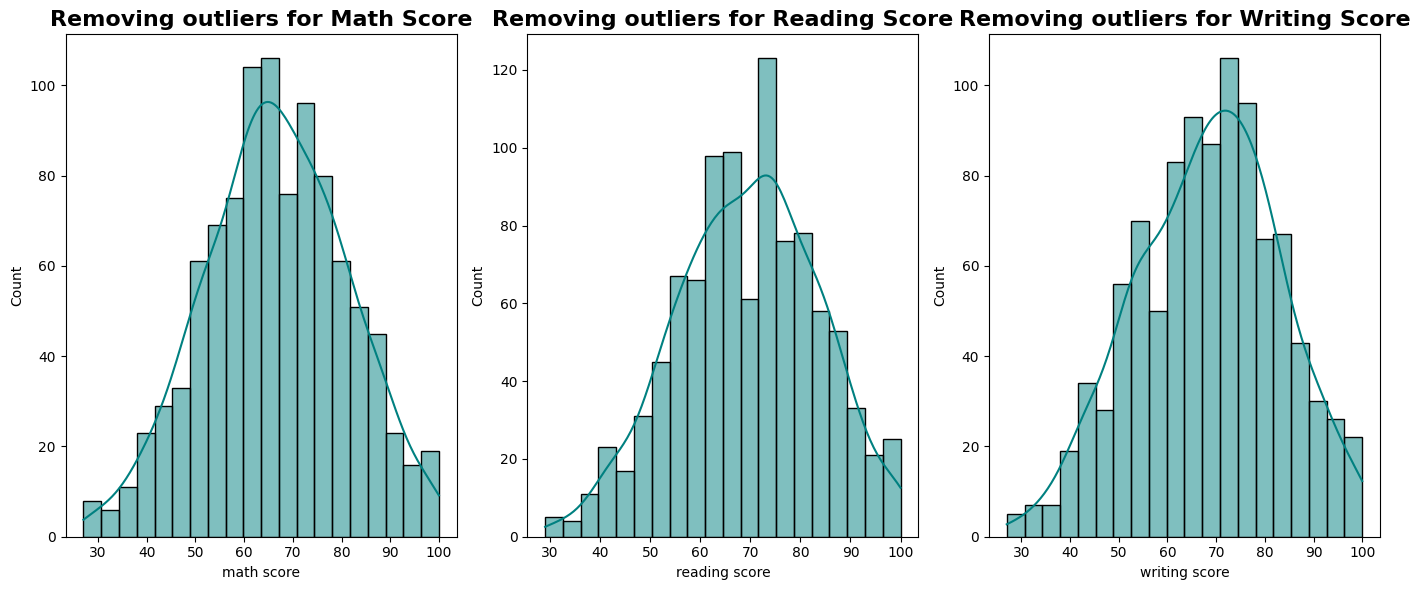

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Math score histogram
sns.histplot(newdf1["math score"], kde=True, bins=20, edgecolor='black', color="teal", ax=axes[0])
axes[0].set_title('Removing outliers for Math Score', fontsize=16, fontweight="bold")

# Reading score histogram
sns.histplot(newdf2["reading score"], kde=True, bins=20, edgecolor='black', color="teal", ax=axes[1])
axes[1].set_title('Removing outliers for Reading Score', fontsize=16, fontweight="bold")

# Writing score histogram
sns.histplot(newdf3["writing score"], kde=True, bins=20, edgecolor='black', color="teal", ax=axes[2])
axes[2].set_title('Removing outliers for Writing Score', fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

- 3.2.	Calculate and interpret the skewness for each of these score columns.


In [97]:
print(newdf1['math score'].skew())

print(newdf2['reading score'].skew())

print(newdf3['writing score'].skew())

-0.06930576171107476
-0.13875590076628647
-0.1632353356440884


- 3.3.	Discuss whether the distributions are skewed to the left or right and suggest any appropriate transformations if needed to address skewness.


In [129]:
def anlys_skewness(data):
    skewness = data.skew()
    print("\n")
    if skewness > 0:
        print("Positively skewed (right skewed).")
        print("Apply a log or square root .")
    elif skewness < 0:
        print("Negatively skewed (left skewed).")
        print("Apply a reflection and then log or square root.")
    else:
        print("This is approximately symmetrical.")
        print("No transformation needed.")


anlys_skewness(newdf1['math score'])
anlys_skewness(newdf2['reading score'])
anlys_skewness(newdf3['writing score'])



Negatively skewed (left skewed).
Apply a reflection and then log or square root.


Negatively skewed (left skewed).
Apply a reflection and then log or square root.


Negatively skewed (left skewed).
Apply a reflection and then log or square root.


In [130]:
m_log =newdf1.copy()
m_log["LogM_alt"] = np.log1p(m_log["math score"])
r_log =newdf2.copy()
r_log["LogR_alt"] = np.log1p(r_log["reading score"])
w_log =newdf3.copy()
w_log["LogW_alt"] = np.log1p(w_log["writing score"])

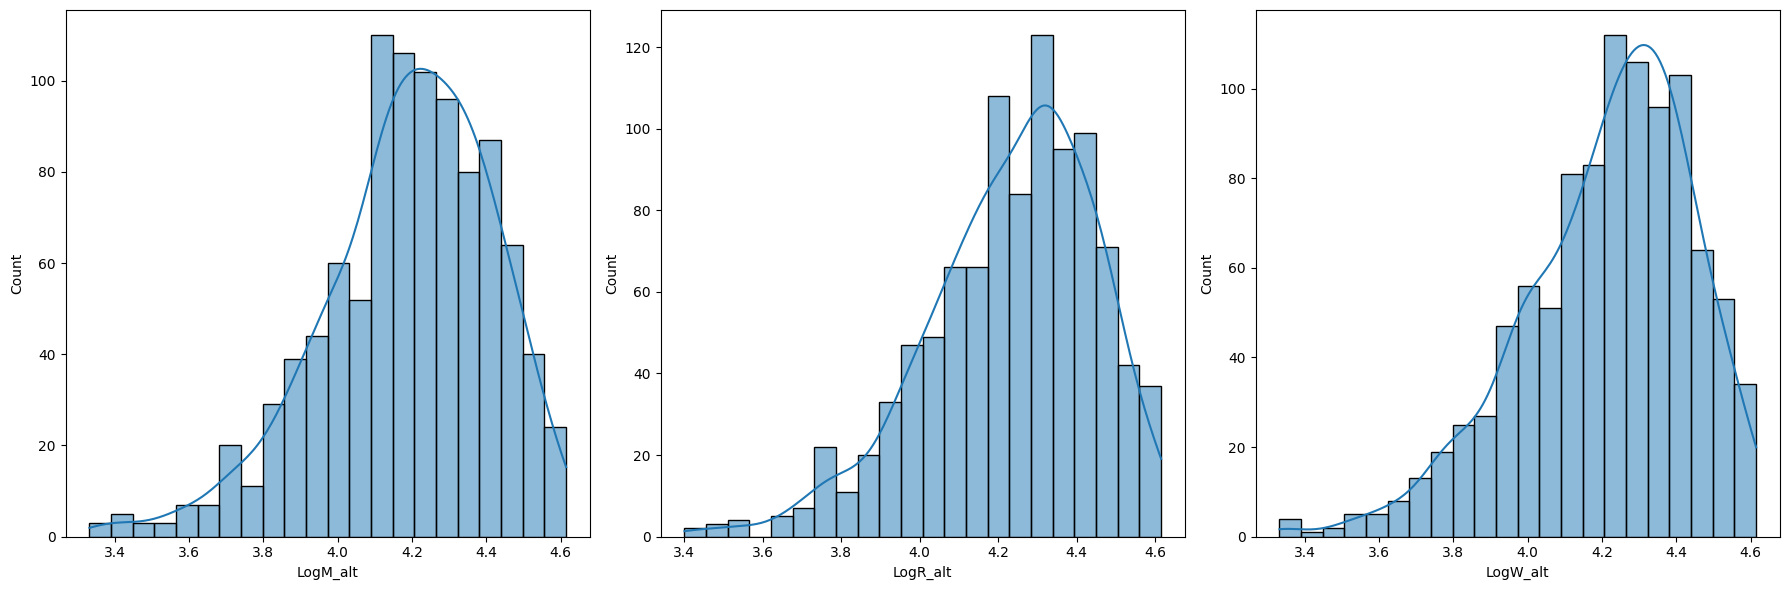

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(m_log["LogM_alt"], ax=axes[0], kde=True, fill=True)
sns.histplot(r_log["LogR_alt"], ax=axes[1], kde=True, fill=True)
sns.histplot(w_log["LogW_alt"], ax=axes[2], kde=True, fill=True)
plt.tight_layout()
plt.show()

# 4.	Hypothesis Testing:
### 4.1.	Formulate Hypotheses:


-  -> **H₀ (Null Hypothesis): Assumes that there is a significant no difference between the two groups.**
-  -> **H₁ (Alternative Hypothesis): Assumes that there is a significant difference between the two groups.**

### 4.2.	Significance Level:

#### we will use the commonly accepted significance level α = 0.05 for our hypothesis test

### 4.3.	t-test Test Statistic & p-value:

In [127]:
import scipy.stats as stats

# Assuming your DataFrame is named df and has the necessary columns
group_1 = dataset[dataset['test preparation course'] == "completed"]['math score']  # Completed course
group_2 = dataset[dataset['test preparation course'] == "none"]['math score']  # Did not complete course

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(group_1, group_2)

# Output the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value:.4f}")

t-statistic: 5.704616417349102
p-value: 0.0000


# 4.4.	Decision:

➢	Based on the p-value or the t-statistic, decide whether to reject or fail to reject the null hypothesis.
- **The p-value is 0.0000, which is less than 0.05. Therefore, we reject the null hypothesis.**

➢	Discuss the implications of your decision in relation to the context of the problem.

- **There is strong evidence to support that completing the test preparation course significantly improves math scores.**
-  **This suggests that students who engage in test preparation are more likely to perform better than those who do not.**